In [1]:
%matplotlib inline

from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from ripser import ripser
from persim import plot_diagrams

from atlas_pam import *

In [2]:
counts_M = pd.read_csv("peyers_data/counts_M.csv", index_col=0)
normCounts_M = pd.read_csv("peyers_data/normCounts_M.csv", index_col=0)
md_M = pd.read_csv("peyers_data/md_M.txt", index_col=0,
                  sep="\t")

counts_tissue = pd.read_csv("peyers_data/counts_tissue.csv", index_col=0)
normCounts_tissue = pd.read_csv("peyers_data/normCounts_tissue.csv",
                                index_col=0)
md_tissue = pd.read_csv("peyers_data/md_tissue.txt", index_col=0,
                       sep="\t")

In [3]:
X_M = counts_M.to_numpy().T
X_M_norm = normCounts_M.to_numpy().T
X_tissue = counts_tissue.to_numpy().T
X_tissue_norm = normCounts_tissue.to_numpy().T

logX_M = np.log(X_M + 1)
logX_M_norm = np.log(X_M_norm + 1)
logX_tissue = np.log(X_tissue + 1)
logX_tissue_norm = np.log(X_tissue_norm + 1)

dist_mat_M = euclidean_distances(logX_M)
dist_mat_M_norm = euclidean_distances(logX_M_norm)
dist_mat_tissue = euclidean_distances(logX_tissue)
dist_mat_tissue_norm = euclidean_distances(logX_tissue_norm)

In [4]:
def look_at_homology(dist_mat):
    print("Computing persistent homology...")
    start = time()
    rips_dict = ripser(dist_mat, maxdim=2,
                      distance_matrix=True)
    print("Time elapsed: "+str(time() - start)+" seconds")
    dgms = rips_dict["dgms"]
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot()
    plot_diagrams(dgms, ax=ax)
    
    plt.show()

Computing persistent homology...
Time elapsed: 0.024142980575561523 seconds


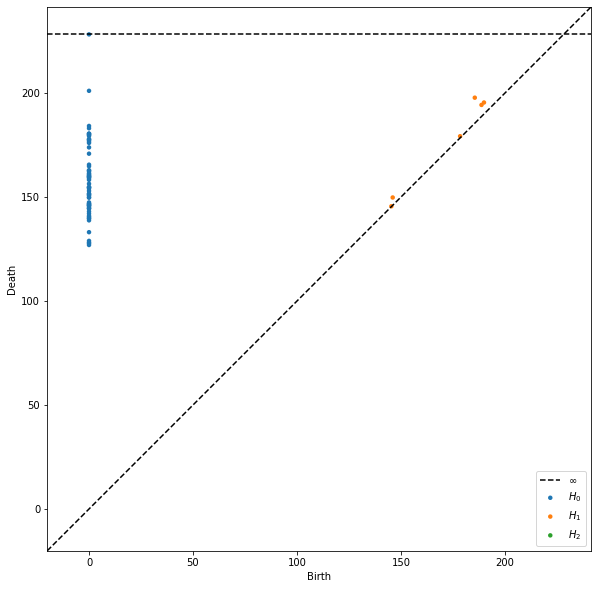

In [5]:
look_at_homology(dist_mat_M)

Computing persistent homology...
Time elapsed: 0.029214859008789062 seconds


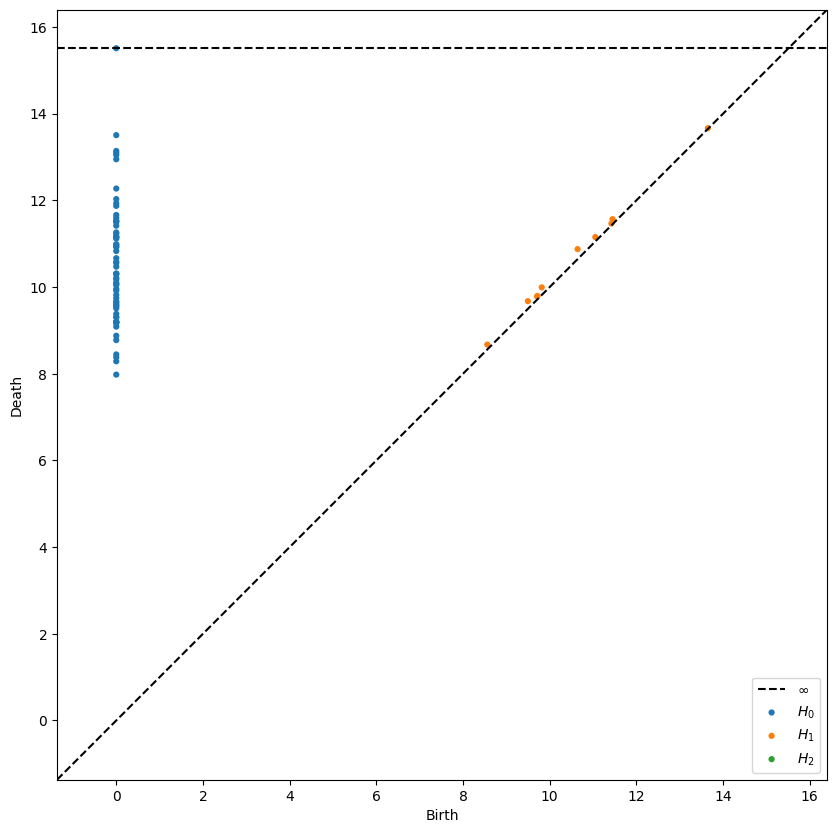

In [6]:
look_at_homology(dist_mat_M_norm)

Computing persistent homology...
Time elapsed: 0.05348324775695801 seconds


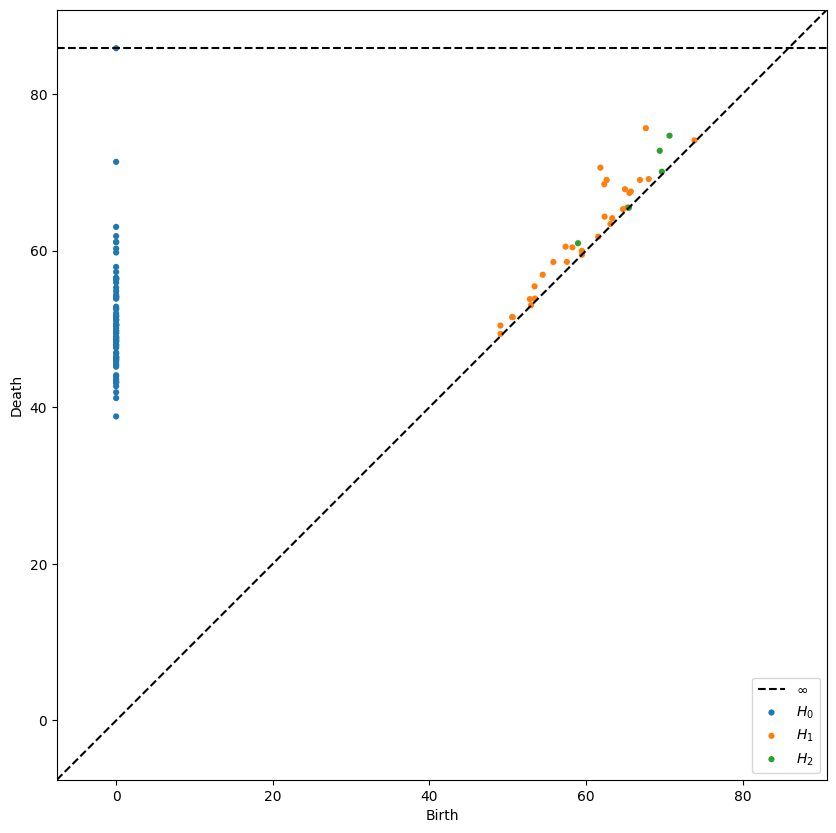

In [7]:
look_at_homology(dist_mat_tissue)

Computing persistent homology...
Time elapsed: 0.030852794647216797 seconds


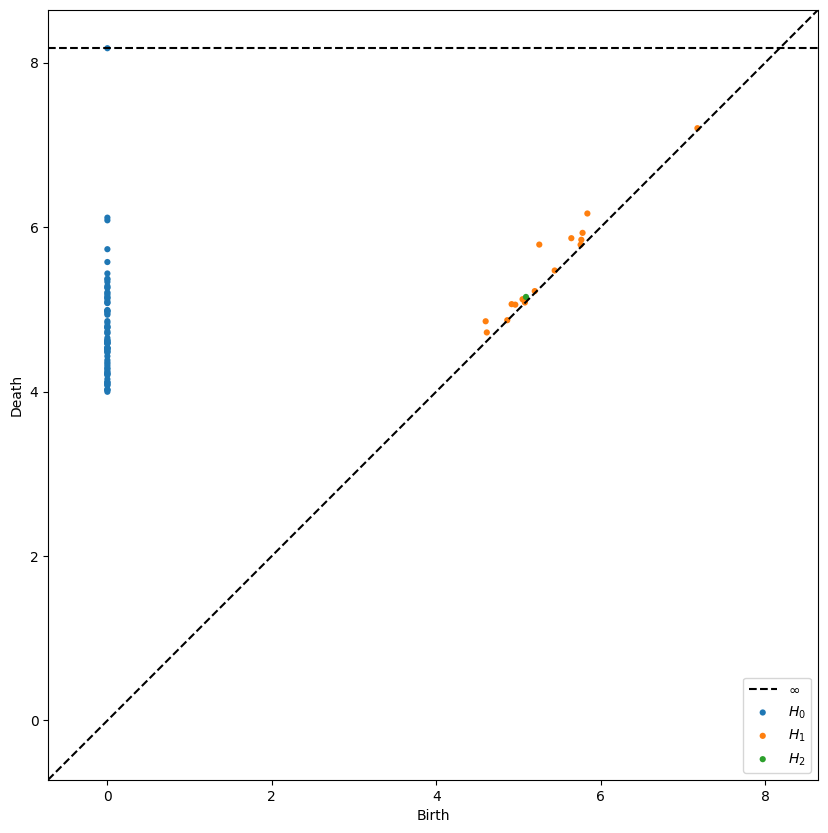

In [8]:
look_at_homology(dist_mat_tissue_norm)

In [9]:
def get_most_variable_genes(X, p):
    var_vec = np.var(X, axis=0)
    ind_list = list(range(len(var_vec)))
    ind_list.sort(key=lambda x: var_vec[x], reverse=True)
    top_inds = ind_list[:p]
    return top_inds

In [10]:
inds_dict = {}
Xs_str = ["X_M_norm", "X_tissue_norm"]
Xs = [X_M_norm, X_tissue_norm]
ps = [50, 500, 1000, 2500]

for X, X_str in zip(Xs, Xs_str):
    for p in ps:
        inds_dict[(X_str, p)] = get_most_variable_genes(X, p)

X_M_norm 50
Computing persistent homology...
Time elapsed: 0.023548364639282227 seconds


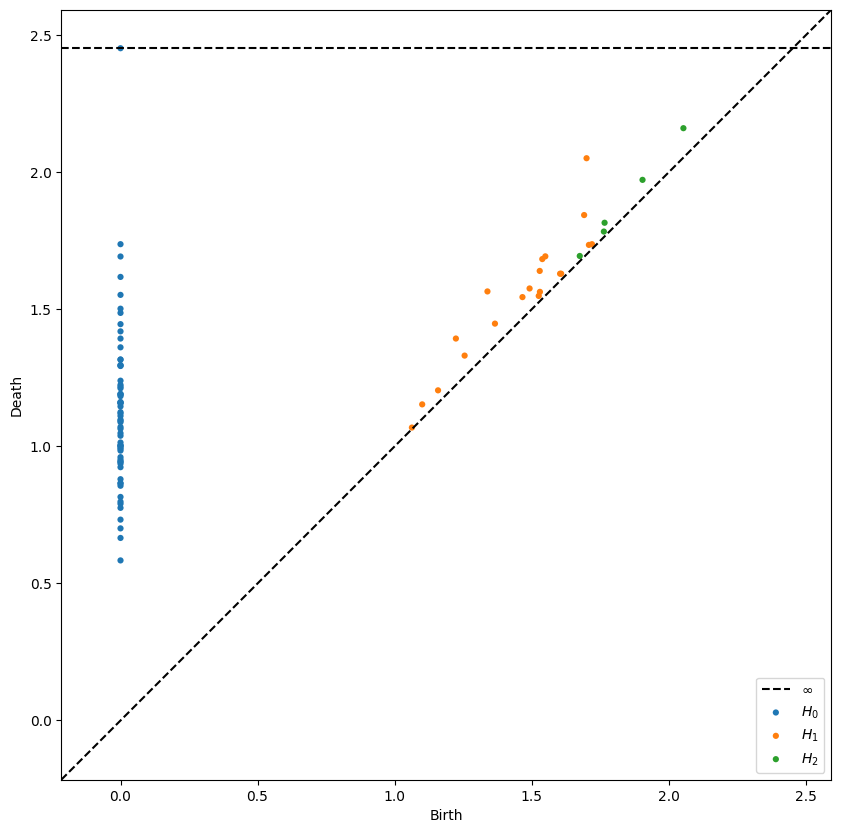

X_M_norm 500
Computing persistent homology...
Time elapsed: 0.024695634841918945 seconds


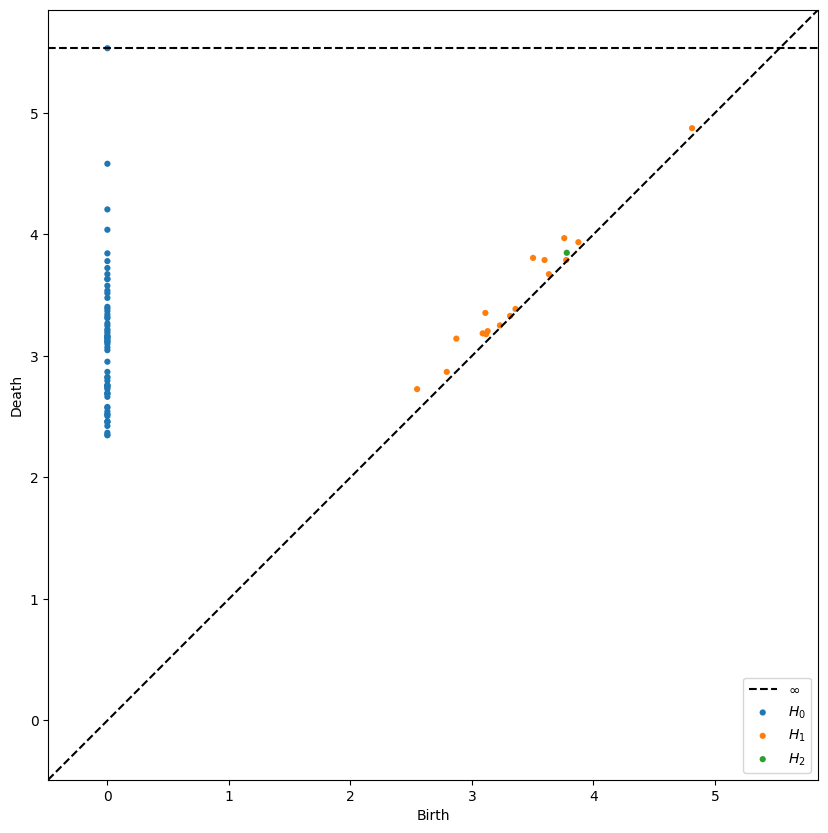

X_M_norm 1000
Computing persistent homology...
Time elapsed: 0.03099513053894043 seconds


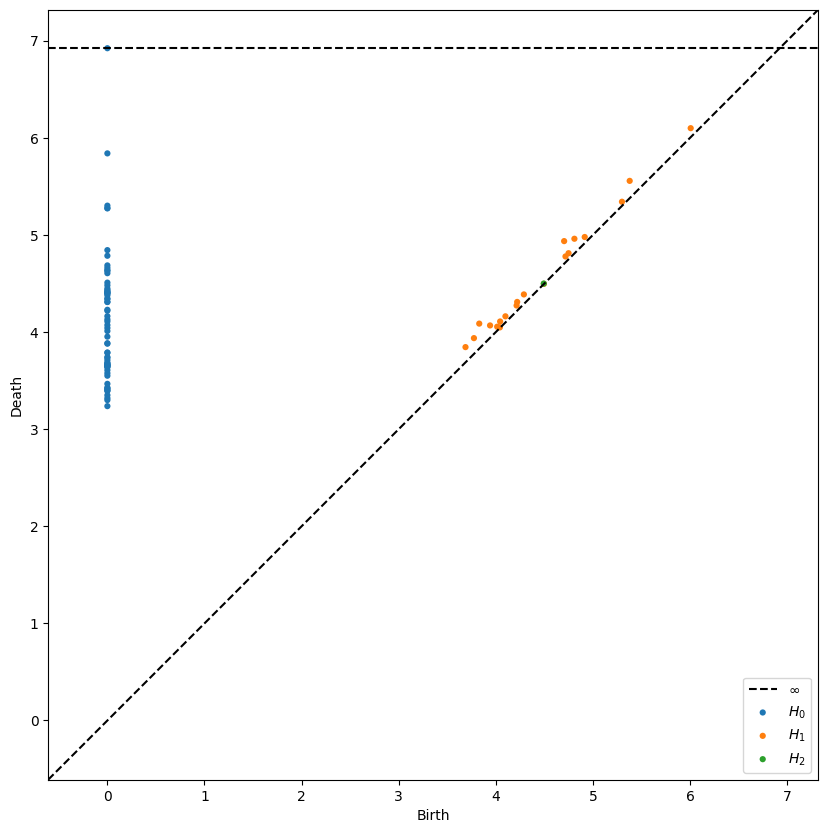

X_M_norm 2500
Computing persistent homology...
Time elapsed: 0.027405500411987305 seconds


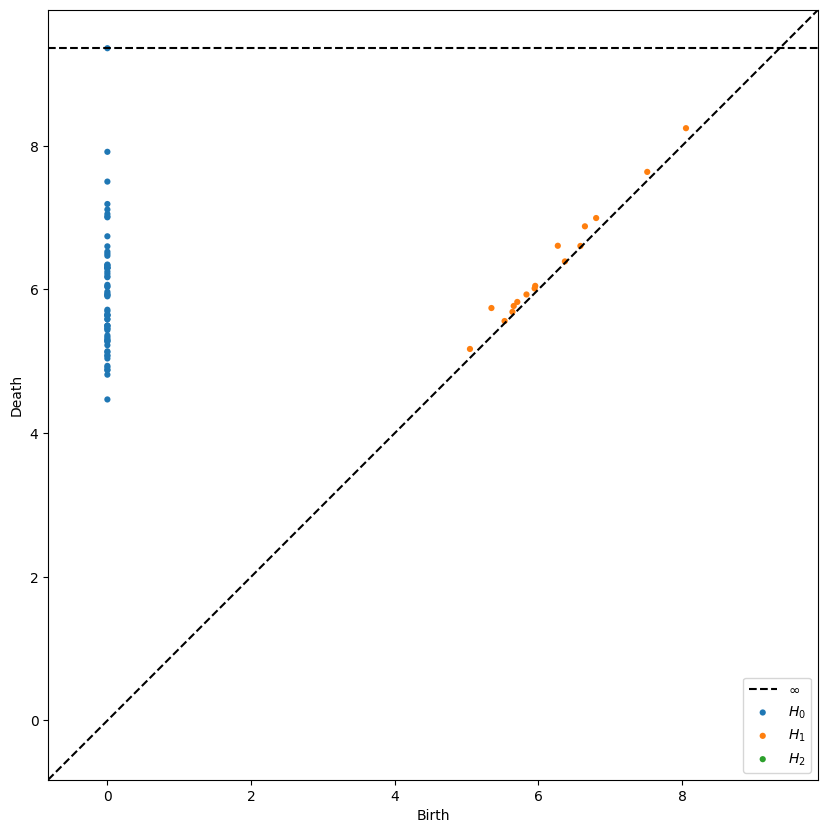

X_tissue_norm 50
Computing persistent homology...
Time elapsed: 0.03423452377319336 seconds


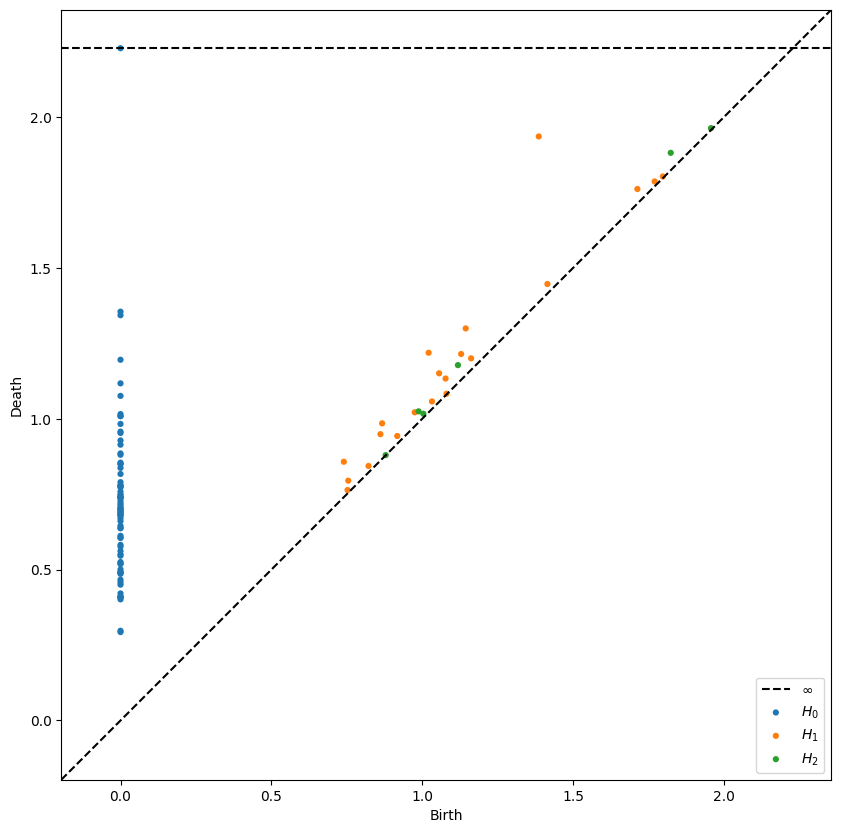

X_tissue_norm 500
Computing persistent homology...
Time elapsed: 0.028289318084716797 seconds


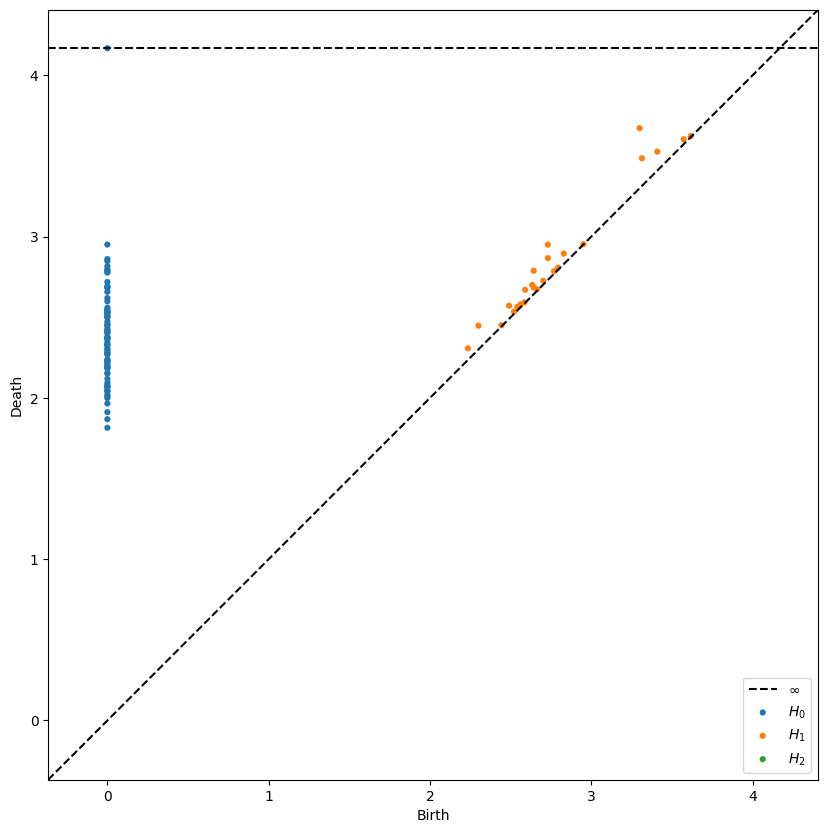

X_tissue_norm 1000
Computing persistent homology...
Time elapsed: 0.03425884246826172 seconds


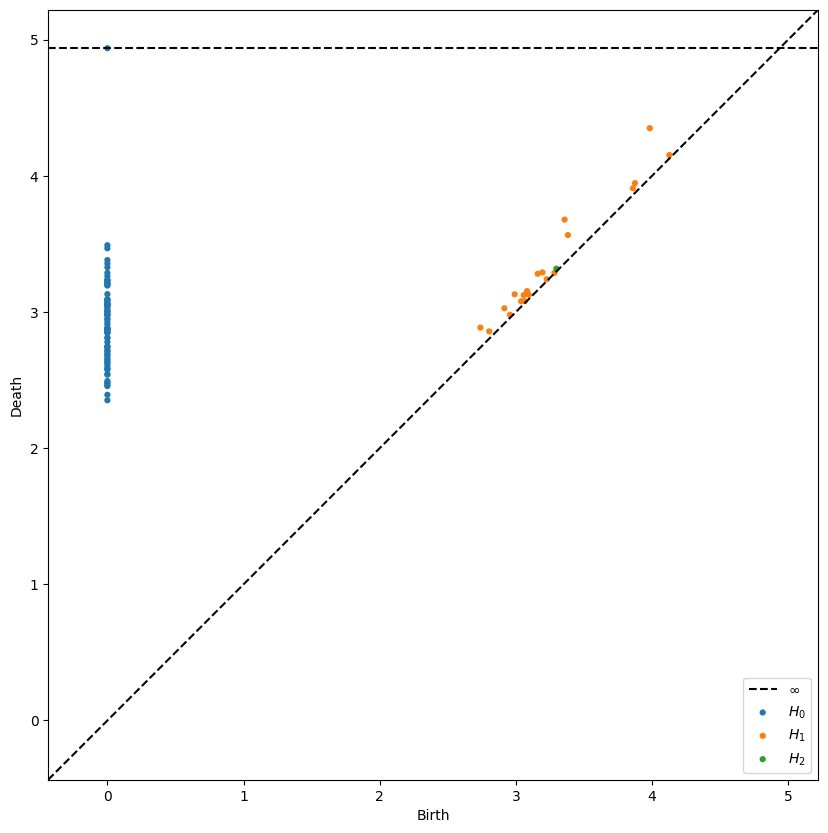

X_tissue_norm 2500
Computing persistent homology...
Time elapsed: 0.030007600784301758 seconds


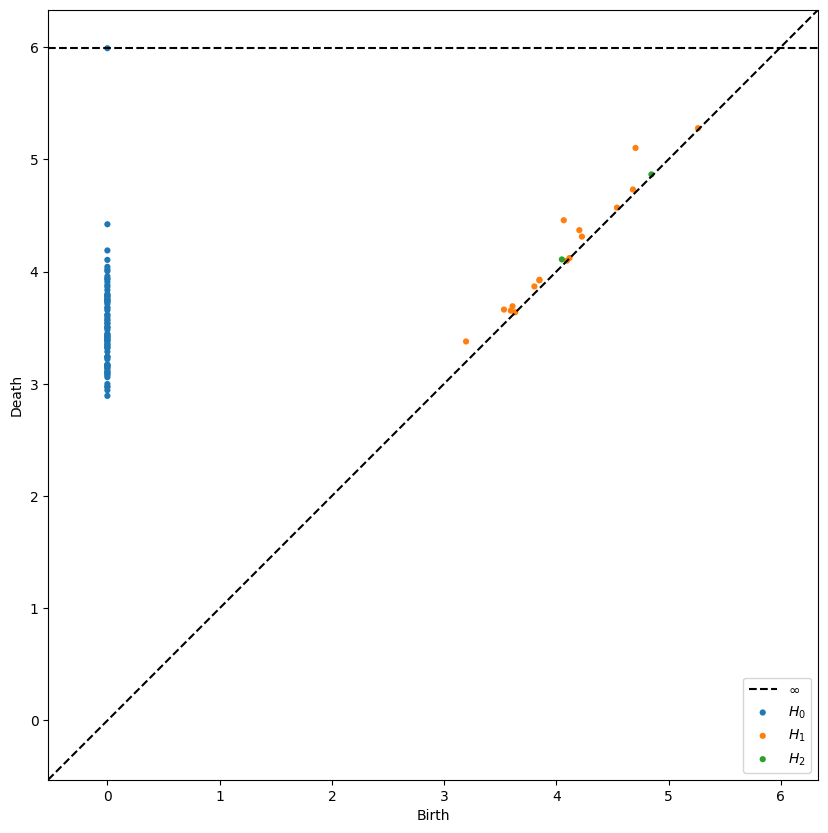

In [12]:
for X, X_str in zip(Xs, Xs_str):
    for p in ps:
        inds = inds_dict[(X_str, p)]
        X_trim = X[:, inds]
        logX = np.log(1 + X_trim)
        dist_mat = euclidean_distances(logX)
        print(X_str, p)
        look_at_homology(dist_mat)